### **Detection Theory**

So far, in estimation, we've tried to *find the value* of an unknown parameter. In detection, the problem is different: we have to *decide* whether an event or a signal is present or not.

#### **1. What is Binary Hypothesis Testing (Signal Detection)?**

*   **Concept:** Binary hypothesis testing is the process of making a decision between **two possible hypotheses** based on noisy observations (our "signals").
    *   **Null Hypothesis ($H_0$):** Represents the absence of the signal of interest (e.g., "the signal is not present," "the target is not there," "only noise").
    *   **Alternative Hypothesis ($H_1$):** Represents the presence of the signal of interest (e.g., "the signal *is* present," "there is a target," "signal + noise").
*   **The Challenge:** Due to noise, we are never 100% certain. We must design a "decision rule" that tells us when to choose $H_0$ and when to choose $H_1$.

*   **Examples:**
    *   **Radar:** Is there an airplane? ($H_1$) or is there only ambient noise? ($H_0$).
    *   **Medical Diagnosis:** Does the patient have the disease? ($H_1$) or are they healthy? ($H_0$).
    *   **Digital Communication:** Was a "1" received? ($H_1$) or a "0"? ($H_0$).

---

#### **2. Quality Parameters in Detection (Types of Errors)**

In detection, our decisions can be correct or incorrect, leading to two crucial types of errors:

1.  **Type I Error: False Alarm (FA)**
    *   **Concept:** **Deciding that the signal is present ($H_1$) when, in reality, it is *not* ($H_0$ is true)**.
    *   **Consequence:** It's like shouting "I found it!" when there's nothing there. In radar, it's detecting a phantom aircraft; in medicine, it's a false positive that causes anxiety and unnecessary tests.
    *   **Probability of False Alarm ($P_{FA}$):** The probability that this occurs. $P_{FA} = P(\text{Decide } H_1 | H_0 \text{ is true})$.

2.  **Type II Error: Miss Detection (MD)**
    *   **Concept:** **Deciding that the signal is *not* present ($H_0$) when, in reality, it *is* ($H_1$ is true)**.
    *   **Consequence:** It's like failing to see something that is actually there. In radar, it's failing to detect a real aircraft; in medicine, it's a false negative that could lead to delayed treatment.
    *   **Probability of Miss Detection ($P_{MD}$):** The probability that this occurs. $P_{MD} = P(\text{Decide } H_0 | H_1 \text{ is true})$.

*   **Complementary Metric: Probability of Detection (PD)**
    *   Often, instead of $P_{MD}$, we use **Probability of Detection ($P_D$)**:
    *   $P_D = 1 - P_{MD} = P(\text{Decide } H_1 | H_1 \text{ is true})$. This is the **probability of correctly detecting the signal when it's present**. We want this to be high!

**The Trade-off:**
There's usually a **trade-off** between $P_{FA}$ and $P_D$. Decreasing one often increases the other. The goal is to design a detector that achieves the best possible balance for the specific application.

---

#### **3. Classical Detection Methods**

These methods provide decision rules based on optimizing different criteria.

##### **a) Minimum Probability of Error (Min-PE) Detector / Bayes Detector**

*   **What is it?**
    *   This detector aims to **minimize the overall probability of making any error** (either a false alarm or a miss detection).
    *   It requires knowledge of the **prior probabilities** of $H_0$ and $H_1$ (i.e., how likely $H_0$ is to be true, $P(H_0)$, and how likely $H_1$ is to be true, $P(H_1)$).
*   **How it works (Intuition):**
    *   For a given observation $\mathbf{x}$, it calculates the posterior probabilities $P(H_0 | \mathbf{x})$ and $P(H_1 | \mathbf{x})$ using Bayes' Theorem.
    *   It then simply chooses the hypothesis that has the **higher posterior probability**.
    *   The decision rule is often expressed as comparing a **Likelihood Ratio** $L(\mathbf{x}) = \frac{P(\mathbf{x} | H_1)}{P(\mathbf{x} | H_0)}$ to a **threshold** $\eta$:
        $\text{If } L(\mathbf{x}) > \eta, \text{ decide } H_1$
        $\text{If } L(\mathbf{x}) < \eta, \text{ decide } H_0$
        (where $\eta = P(H_0)/P(H_1)$ for Min-PE without cost functions).
*   **When to use it?**
    *   When you know the **prior probabilities** of $H_0$ and $H_1$ (e.g., you know a signal is present 30% of the time).
    *   When the **costs of false alarms and miss detections are equal** (or you're not explicitly penalizing one more than the other).
    *   It provides the absolute best performance if all required probabilities are known.

##### **b) Neyman-Pearson (NP) Detector**

*   **What is it?**
    *   The NP detector aims to **maximize the Probability of Detection ($P_D$)** for a **fixed (or constrained) Probability of False Alarm ($P_{FA}$)**.
    *   It's used when one type of error (false alarm) is more tolerable or has a strictly defined limit.
*   **How it works (Intuition):**
    *   Instead of trying to minimize total error (which requires knowing prior probabilities), the NP detector says: "I will tolerate *at most* a certain percentage of false alarms (e.g., 1%). Given that constraint, how good can I make my detection rate?"
    *   It uses the same **Likelihood Ratio** test as the Bayes detector, $L(\mathbf{x}) = \frac{P(\mathbf{x} | H_1)}{P(\mathbf{x} | H_0)}$.
    *   However, the **threshold ($\eta$) is now set by the desired $P_{FA}$**. You adjust $\eta$ until your false alarm rate reaches the desired level, and that threshold then gives you the maximum possible $P_D$.
*   **When to use it?**
    *   When **prior probabilities $P(H_0)$ and $P(H_1)$ are unknown**.
    *   When there's a **strict constraint on the false alarm rate**. This is very common in radar, medical imaging, and quality control, where false alarms can be costly or dangerous.
    *   It's often considered the "gold standard" in signal detection for many engineering applications.

---

**Summary (Min-PE vs. Neyman-Pearson):**

*   **Min-PE:** Minimizes total error, requires prior probabilities of $H_0/H_1$.
*   **Neyman-Pearson:** Maximizes $P_D$ for a *given $P_{FA}$*, does *not* require prior probabilities.

Next, we'll dive into the radar example with a CW burst, correlating and applying the Neyman-Pearson criterion.

#### Example of detection. Constant Signal Level Detection.

We are asked to detect a constant level A in the presence of Gaussian noise, with mean $\mu=0$ and variance $\sigma^2$. Recall that in the case of Gaussian noise, the variance is the average noise power. In our case, there will be two hypotheses: $H_0$, only noise; and $H_1$, constant $A$ and noise. That is,

\begin{equation}
 H_0 : x = w\\
 H_1 : x = A + w
 \tag{1}
\end{equation}

where $x$ is the observation, $A$ is a constant, and $w \sim N(0,σ^2)$.

Under hypothesis $H_0$, the observations are just noise, thus they behave as a Gaussian with zero mean and variance $\sigma^2$. Under hypothesis $H_1$, they behave as a Gaussian with mean $\mu=A$, since $A$ is a constant added to the noise, which shifts the mean to $A$. Since $A$ is constant, the variance remains $\sigma^2$, so:

\begin{equation}
 p(x|H_0) \sim N(0,σ^2) \\
 p(x|H_1) \sim N(A,σ^2) 
 \tag{2}
\end{equation}

According to the Neyman-Pearson criterion, the maximum probability of detection $P_D$ is obtained by deciding between hypotheses $H_1$ and $H_0$ by comparing the likelihood ratio with a threshold $\gamma$ such that:

\begin{equation}
 L(x)=\frac{p(x|H_1)}{p(x|H_0)} \overset{H_1}{\underset{H_0}{\gtrless}} \gamma
 \tag{3}
\end{equation}

by fixing $\gamma$ for a given $P_{FA}$.

Considering that the probability density function $p(x)$ of a Gaussian $N(\mu, \sigma^2)$ is:

\begin{equation}
  p(x)=\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}
 \tag{4}
 \end{equation}

If we substitute (4) into (2) for the different hypotheses

\begin{equation}
 p(x|H_0) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{x^2}{2\sigma^2}}
 \\
 p(x|H_1) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x-A)^2}{2\sigma^2}}
 \tag{5}
 \end{equation}

And using (5) in (3):

\begin{equation}
 \frac{\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x-A)^2}{2\sigma^2}}}{\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{x^2}{2\sigma^2}}}
 \tag{6}
\end{equation}

And simplifying the expression

\begin{equation}
e^{-\frac{1}{2\sigma^2} \cdot \big((x-A)^2-x^2\big)}\overset{H_1}{\underset{H_0}{\gtrless}} \gamma
 \tag{7}
\end{equation}

If we apply logarithms to both sides:

\begin{equation}
-\frac{1}{2\sigma^2} \cdot \big((x-A)^2-x^2\big) \overset{H_1}{\underset{H_0}{\gtrless}} \ln\gamma
 \tag{8}
\end{equation}

And finally, solving for $x$ we obtain:

\begin{equation}
  x \overset{H_1}{\underset{H_0}{\gtrless}} \eta = \frac{\sigma^2\ln\gamma}{A} + \frac{A}{2}
 \tag{9}
\end{equation}

The problem is reduced to comparing a sufficient statistic $T(x)$ with a threshold $\eta$. In this particular case, the sufficient statistic is $T(x)=x$, and the threshold $\eta$ is what appears on the right side of the inequality in (9). The maximum probability of detection $P_D$ will be obtained with a threshold $\eta$ fixed for a given $P_{FA}$, calculating both probabilities with the probability density functions of the statistic $T(x)$ under hypotheses $H_0$ and $H_1$.

Now, let's create the probability density functions (pdf) for the two hypotheses so we can plot them, and then use them to generate examples. For this, we can use the tools from the *scipy.stats* toolbox, which allows us to create statistical distributions as objects.

Next, we define the variables and constants of the problem according to the statement. We can change them at any time to check their effect:



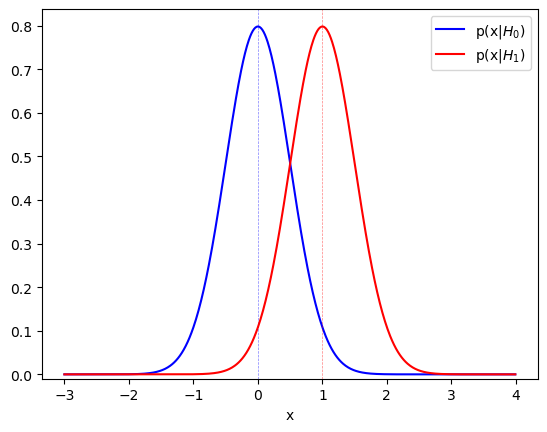

In [1]:
from scipy import signal
from scipy import stats
import numpy as np
import matplotlib.pylab as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from matplotlib.gridspec import GridSpec # for subplots with different number of rows/columns

A = 1 # Constant amplitude
PH1 = 1/2 # probability of hypothesis 1
PH0 = 1/2 # probability of hypothesis 0
PFA = 0.1 # probability of false alarm for Neyman-Pearson
NoisePower = 0.25 # Noise power (variance)
NoiseMean = 0  # Mean of Gaussian Noise

NoisePower = 0.25 # noise power
Mean_H0= 0  # mean under H0
Std_H0 = np.sqrt(NoisePower)  # std under H0
Mean_H1= A # mean under H1
Std_H1 = np.sqrt(NoisePower)  # std under H1
x_values = np.arange(Mean_H0-6*Std_H0, Mean_H1+6*Std_H1, 0.01)  # creates axis for observations using 6 times the span of the gaussians
pdf_H0 = stats.norm(Mean_H0, Std_H0)
pdf_H1 = stats.norm(Mean_H1, Std_H1)

plt.plot(x_values, pdf_H0.pdf(x_values), color='blue', label='p(x|$H_0$)')
plt.axvline(x=Mean_H0, color='blue', linestyle='--', linewidth=0.5, alpha=0.5)
plt.plot(x_values, pdf_H1.pdf(x_values), color='red', label='p(x|$H_1$)')
plt.axvline(x=Mean_H1, color='red', linestyle='--', linewidth=0.5, alpha=0.5)
plt.ylim(bottom=-0.01)
plt.xlabel('x')
plt.legend()

print()

According to the previous, $P_{FA}$ is the probability that the statistic exceeds the detection threshold, under hypothesis $H_0$ (no signal). The pdf of this probability is that of the observation with only noise. In this particular case, according to (9), the statistic coincides with the observation, so its pdf also does, which means:

\begin{equation}
P_{FA} = \int_{\eta}^{\infty}p(x|H_0)\partial x
 \tag{10}
\end{equation}

We must solve for $\eta$ in the above expression, and once calculated, use it to compute $P_D$, which will be the probability of exceeding the threshold $\eta$ under hypothesis $H_1$, i.e.:

\begin{equation}
P_D = \int_{\eta}^{\infty}p(x|H_1)\partial x
 \tag{11}
\end{equation}

To calculate the threshold, we should use the Q-functions, but we can leverage the stats libraries, which provide all the necessary values from the previously created probability density functions, as shown in the following code.

In [10]:
Pfa_NP = PFA # given by the problem statement
Th = pdf_H0.ppf(1-Pfa_NP)  # calculates threshold under hypothesis H0
Pd = 1-pdf_H1.cdf(Th)  # calculates Pd under hypothesis H1 (once the threshold is known)
print("Under the Neyman-Pearson criterion, the detector's performance for the given values of A and Noise Power are")
print(f"Probabilty of False Alarm - Pfa = {Pfa_NP:.4f}")
print(f"Threshold = {Th:.4f}")
print(f"Probability of Detection - Pd = {Pd:.4f}")

Under the Neyman-Pearson criterion, the detector's performance for the given values of A and Noise Power are
Probabilty of False Alarm - Pfa = 0.1000
Threshold = 0.6408
Probability of Detection - Pd = 0.7638


To analyze the detector's behavior, we must plot $P_D$ as a function of all possible $P_{FA}$ values. This way, we will plot what are known as Receiver Operating Characteristics (ROC) curves.

For a better understanding of the dependence between the different detector parameters, we will repeat the calculations, interactively varying the Signal-to-Noise Ratio (SNR). Recall that the SNR is the ratio between the signal power (or energy) and the noise power. In this case, the signal is a constant of value A, and the noise power is $σ^2$:
\begin{equation}
SNR = \frac{A^2}{σ^2}
 \tag{12}
\end{equation}

If we set $A=1$, we can explore the detector's behavior simply by varying the noise power, i.e., $σ^2$. The following code generates interfaces that allow the user to modify the desired $P_{FA}$ and the $SNR$.

In [34]:
# inicializamos vectores

w_PFA = widgets.FloatSlider(value=0.1, min=0.01, max=0.5, step=0.01,
                         description='PFA:', disabled=False,
                         continuous_update=False)

w_A = widgets.BoundedFloatText(value=1, min=0, max=20,
                         description='Signal level:', disabled=False,
                         continuous_update=False)

w_SNR = widgets.BoundedFloatText(value=5, min=0, max=20, step=1,
                         description='SNR (dB):', disabled=False,
                         continuous_update=False)

def plotROCpdf(A, SNRdB, Noise_mean=0, PFA=0.1):
    #A, signal level, convert to natural units
    SNR = 10**(SNRdB/10) # Signal-to-Noise Ration, convert to natural units
    NoisePower = A**2/SNR # noise power as a function of the signal level A
    Std_H0 = np.sqrt(NoisePower) # Noise standard deviation under H0
    Std_H1 = np.sqrt(NoisePower) # Standard deviation under H1
    Mean_H0 = 0 # mean under H0
    Mean_H1 = A # mean under H1
    pdf_H0 = stats.norm(Mean_H0, Std_H0) # pdf de la hipótesis 0
    pdf_H1 = stats.norm(Mean_H1, Std_H1) # pdf de la hipótesis 1
    x_values = np.arange(Mean_H0-5*Std_H0, Mean_H1+5*Std_H1, 0.01)  # creates axis for observations using 5 times the span of the gaussians
    # Calculate threshold and PD for the specified PFA  
    TH = pdf_H0.ppf(1-PFA)
    PD = 1-pdf_H1.cdf(TH)
    print('For PFA={:.3f} and NoisePower={:.3f}, the threshold id TH={:.3f}, and the PD={:.3f}'.format(PFA,NoisePower,TH,PD))
    
    #  To plot the ROC, calculates Th and Pd for all PFA
    for i in np.arange(len(Pfa_NP)):
        Th = pdf_H0.ppf(1-Pfa_NP[i])
        Pd_NP[i] = 1-pdf_H1.cdf(Th)
        
    fig = plt.figure(figsize=[10, 3])
    ax1 = fig.add_subplot(131)
    ax2 = fig.add_subplot(122)
    
    # plot ROC
    ax1.plot(Pfa_NP, Pd_NP, label='$\sigma^2$={}'.format(NoisePower))
    ax1.axvline(x=PFA, ymin=0, ymax=PD, color='black', linestyle='--', linewidth=1)
    ax1.axhline(y=PD, xmin=0, xmax=PFA, color='black', linestyle='--', linewidth=1)
    ax1.plot(PFA, PD, color='black', marker='o') # specified PFA
    ax1.set_ylim([0, 1])
    ax1.set_xlim([-0.001, 1])
    ax1.set_aspect('equal', 'box')
    ax1.set_xlabel('$P_{FA}$')
    ax1.set_ylabel('$P_{D}$')
    ax1.set_title('ROC')
    
    # plot pdf
    ax2.plot(x_values, pdf_H0.pdf(x_values), color='blue', label='p(x|$H_0$)') # p(x|H0)
    ax2.plot(x_values, pdf_H1.pdf(x_values), color='red', label='p(x|$H_1$)') # p(x|H1)
    
    # fill area under pdf beyond selected PFA
    x_tofill = np.arange(TH, x_values[-1], 0.01)
    ax2.fill_between(x_tofill,  pdf_H1.pdf(x_tofill), y2=0, color='coral', alpha=0.5)
    ax2.fill_between(x_tofill,  pdf_H0.pdf(x_tofill), y2=0, color='blue', alpha=0.5)
    
    # plot vertical line at TH
    ax2.axvline(x=TH, color='black', linewidth=1, label=f"Threshold={TH:.2f}")
    ax2.axvline(x=A, color='red', linestyle='--', linewidth=0.5, label=f"A={A:.2f}")
    ax2.set_ylim(bottom=-0.01)
    ax2.set_xlabel('x')
    ax2.set_title('pdf')
    #ax2.legend(loc='upper right')
    ax2.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)

    fig.canvas.draw()
        
ui = widgets.HBox([w_A, w_SNR, w_PFA])
out = widgets.interactive_output(plotROCpdf, {'A':w_A, 'SNRdB':w_SNR, 'PFA':w_PFA})
display(ui, out)


Output()

To better understand the influence of the $SNR$, or equivalently, different noise powers, we will plot several ROC curves together for different $SNR$ values.

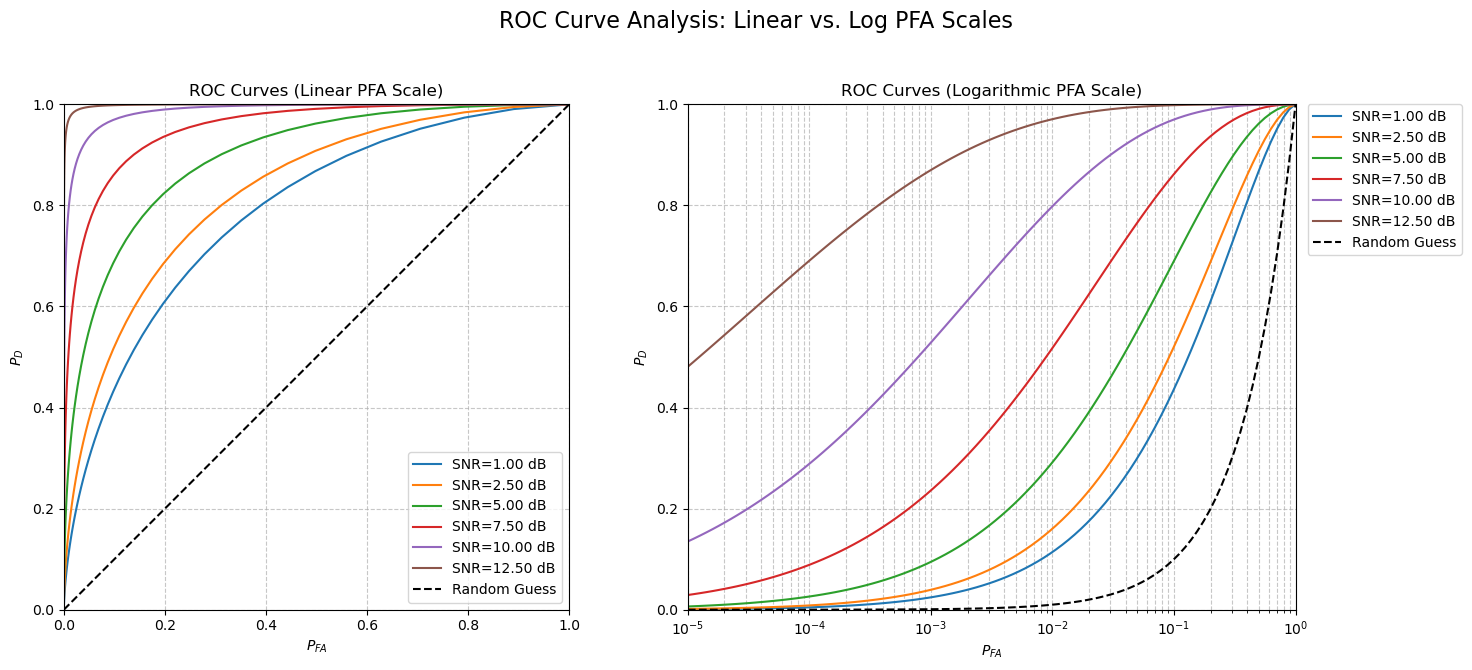

In [67]:
# --- Configuration for ROC Curve Generation ---
# Pfa_NP: Array of Probability of False Alarm (P_FA) values.
# Use np.logspace to generate logarithmically spaced points.
# This ensures good resolution on a log-scaled x-axis, especially for low PFA.
# The range is from 10^-5 to 10^0 (which is 1).
Pfa_NP = np.logspace(-5, 0, 100) # 100 points, logarithmically spaced

# Pd_NP: Array to store calculated Probability of Detection (P_D) values.
Pd_NP = np.zeros_like(Pfa_NP)

# NoisePower: A list of different noise power (sigma^2) values to test, in dB.
SNRdB = np.array([1.0, 2.5, 5.0, 7.5, 10.0, 12.5])
SNR = 10**(SNRdB/10) # SNR in natural units
A = 1.0 # Signal amplitude, normalized
NoisePower = A**2/SNR # noise power in natural units

#np.zeros(len(SNR_values_dB)) # noise power in natural units

# --- Plotting Setup: Two Subplots ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# --- Loop to Calculate and Plot ROC Curves ---
for j in np.arange(len(NoisePower)):
    for i in np.arange(len(Pfa_NP)):
        Th = stats.norm.ppf(1 - Pfa_NP[i], loc=0, scale=np.sqrt(NoisePower[j]))
        Pd_NP[i] = 1 - stats.norm.cdf(Th, loc=A, scale=np.sqrt(NoisePower[j])) 
    # Plot on the LEFT subplot (linear PFA)
    ax1.plot(Pfa_NP, Pd_NP, label='SNR={:.2f} dB'.format(SNRdB[j]))
    # Plot on the RIGHT subplot (log PFA)
    ax2.plot(Pfa_NP, Pd_NP, label='SNR={:.2f} dB'.format(SNRdB[j]))


# --- Customization for LEFT Subplot (Linear PFA) ---
ax1.plot([0, 1], [0, 1], 'k--', label='Random Guess')
ax1.set_ylim([0, 1])
ax1.set_xlim([0, 1])
ax1.set_aspect('equal', 'box')
ax1.set_xlabel('$P_{FA}$')
ax1.set_ylabel('$P_{D}$')
ax1.set_title('ROC Curves (Linear PFA Scale)')
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.legend(loc='lower right')


# --- Customization for RIGHT Subplot (Log PFA) ---
ax2.plot(Pfa_NP, Pfa_NP, 'k--', label='Random Guess') # Corrected for log-linear plot
ax2.set_xscale('log') # Set x-axis to logarithmic scale
ax2.set_ylim([0, 1])
# IMPORVED: Set xlim using the logspace range to avoid large empty space on the right
ax2.set_xlim([Pfa_NP.min(), Pfa_NP.max()])
ax2.set_aspect('auto') # 'auto' aspect ratio for log-linear plot is usually best
ax2.set_xlabel('$P_{FA}$')
ax2.set_ylabel('$P_{D}$')
ax2.set_title('ROC Curves (Logarithmic PFA Scale)')
ax2.grid(True, which="both", ls="--", alpha=0.7)
ax2.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)


# --- Final Figure Adjustments ---
fig.suptitle('ROC Curve Analysis: Linear vs. Log PFA Scales', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 0.95, 0.95])
plt.show()

This is an example of how to check the detector's operation. The example below is for the Neyman-Pearson criterion. You can try with different noise levels. An experimental study using the Monte Carlo method is included in the example to verify whether the theoretical values match the experimental ones.

Example of detector operation according to Neyman-Pearson
for a constant value A immersed in Gaussian noise with mean 0.
Noise power (variance) = 0.100
Constant A = 1.000
Pfa = 0.100
Threshold = 0.405
Pd = 0.970
For the experimental study using the Monte Carlo method, we perform 20000000 tests.
10000000 tests were performed under each hypothesis, with the following result:
There were 1000628 false alarms. Experimental PFA=0.100
There were 9699825 correct detections. Experimental PD=0.970
There were 300175 detection misses. Experimental PMISS=0.030
Total errors 1300803. Experimental Pe=0.065.



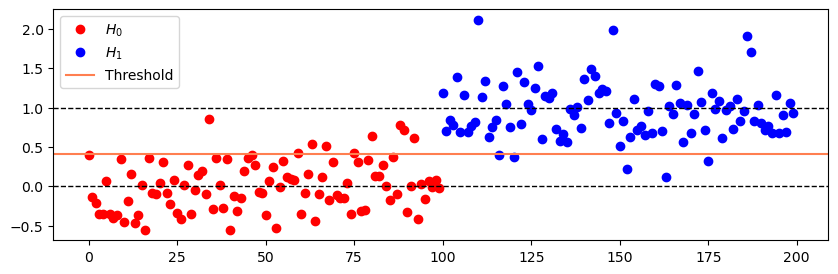

In [1]:
from scipy import signal
from scipy import stats
import numpy as np
import matplotlib.pylab as plt

# Set model parameters
NoisePower = 0.1
A = 1
Pfa_NP = 0.1

# Create pdf
Mean_H0 = 0
Mean_H1 = A
Std_H0 = np.sqrt(NoisePower)
Std_H1 = np.sqrt(NoisePower)
pdf_H0 = stats.norm(Mean_H0, Std_H0) # p(x|H0)
pdf_H1 = stats.norm(Mean_H1, Std_H1) # p(x|H1)

# Calculate threshold and Pd
Th = pdf_H0.ppf(1-Pfa_NP)  # calculate threshold under hypothesis H0
Pd = 1-pdf_H1.cdf(Th)  # calculate Pd under hypothesis H1

# We will make N>100 random observations under each hypothesis
# The number should be high enough for a significant experiment
NExp = 10000000  # number of times we repeat each experiment (for each hypothesis)
x_H0 = pdf_H0.rvs(size=NExp)  # generate samples for noise only according to pH0
x_H1 = pdf_H1.rvs(size=NExp)  # generate samples according to pH1 (signal and noise)
NFA = np.where(x_H0 >= Th)  # number of false alarms H1|H0
NMISS = np.where(x_H1 < Th) # number of Misses H0|H1
ND = np.where(x_H1 >= Th)  # number of correct detections under H1

print('Example of detector operation according to Neyman-Pearson')
print('for a constant value A immersed in Gaussian noise with mean 0.')
print('Noise power (variance) = {:.3f}'.format(NoisePower))
print('Constant A = {:.3f}'.format(A))
print('Pfa = {:.3f}'.format(Pfa_NP))
print('Threshold = {:.3f}'.format(Th))
print('Pd = {:.3f}'.format(Pd))
print('For the experimental study using the Monte Carlo method, we perform {} tests.'.format(2*NExp))
print('{} tests were performed under each hypothesis, with the following result:'.format(NExp))
print('There were {} false alarms. Experimental PFA={:.3f}'.format(len(NFA[0]), len(NFA[0])/NExp))
print('There were {} correct detections. Experimental PD={:.3f}'.format(len(ND[0]), len(ND[0])/NExp))
print('There were {} detection misses. Experimental PMISS={:.3f}'.format(len(NMISS[0]), len(NMISS[0])/NExp))
print('Total errors {}. Experimental Pe={:.3f}.'.format(len(NMISS[0])+len(NFA[0]), (len(NMISS[0])+len(NFA[0]))/(2*NExp) ))
fig = plt.figure(clear=True, figsize=[10, 3])
ax = fig.add_subplot(111)
x_Axis = np.arange(200)
ax.plot(x_Axis[0:100], x_H0[0:100], 'ro', label='$H_0$') # plot point for H0
ax.plot(x_Axis[100:200], x_H1[0:100],'bo', label='$H_1$') # plot point for H1
ax.axhline(y=Th, color='coral', label='Threshold')
ax.axhline(y=A, color='k', linestyle='--', linewidth=1)
ax.axhline(y=0, color='k', linestyle='--', linewidth=1)
ax.legend()

print()

#### Example: Constant Signal Level Detection with $N$ Samples

Next, we will address the problem using $N$ samples in the observation. In this case, hypotheses $H_0$, noise only, and $H_1$, constant $A$ and noise, would be as follows:

\begin{equation}
 H_0 : \underline{x}= \underline{w}\\
 H_1 : \underline{x}= A + \underline{w}
 \tag{13}
\end{equation}

where $\underline{x}$ is the vector of $N$ observations and $\underline{w}$ is a vector of $N$ i.i.d. (independent and identically distributed) white noise samples:

\begin{equation}
 \underline{x}=x[n] = \big[x[0], x[1], ..., x[N-1]\big]^T\\
 \underline{w}=w[n] = \big[w[0], w[1], ..., w[N-1]\big]^T\\
 \tag{14}
\end{equation}

Where each $w[n]$ follows a $N(0,\sigma^2)$ distribution.

If we rewrite the likelihood ratio from (3) but taking into account the new conditions:

\begin{equation}
 L(x)=\frac{p(\underline{x}|H_1)}{p(\underline{x}|H_0)} \overset{H_1}{\underset{H_0}{\gtrless}} \gamma
 \tag{15}
\end{equation}

With this, we now need to calculate the probability density functions $p(\underline{x}|H_0)$ and $p(\underline{x}|H_1)$. We must consider that the noise samples are i.i.d., so the joint density function for all elements of the vector will be equal to the product of the probability density functions of each element, that is:

\begin{equation}
 p(\underline{x}|H_0)= \prod_{n=0}^{N-1} p(x[n]|H_0)   \\
 p(\underline{x}|H_1)= \prod_{n=0}^{N-1} p(x[n]|H_1) 
 \tag{16}
\end{equation}

And assuming (2) and (5), it would be:

\begin{equation}
 p(\underline{x}|H_0)= \prod_{n=0}^{N-1} \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{x[n]^2}{2\sigma^2}}=\frac{1}{(2\pi\sigma^2)^{N/2}}e^{-\frac{\sum_{n=0}^{N-1}x[n]^2}{2\sigma^2}}   \\
 p(\underline{x}|H_1)= \prod_{n=0}^{N-1} \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x[n]-A)^2}{2\sigma^2}}=\frac{1}{(2\pi\sigma^2)^{N/2}}e^{-\frac{\sum_{n=0}^{N-1}(x[n]-A)^2}{2\sigma^2}}
 \tag{17}
\end{equation}

And using (17) in (15):

\begin{equation}
 \frac{\frac{1}{(2\pi\sigma^2)^{N/2}}e^{-\frac{\sum_{n=0}^{N-1}(x[n]-A)^2}{2\sigma^2}}}{\frac{1}{(2\pi\sigma^2)^{N/2}}e^{-\frac{\sum_{n=0}^{N-1}x[n]^2}{2\sigma^2}}}=e^{-\frac{1}{2\sigma^2} \cdot \big(\sum_{n=0}^{N-1}(x[n]-A)^2-\sum_{n=0}^{N-1}x[n]^2\big)}
 \tag{18}
\end{equation}

And simplifying the expression:

\begin{equation}
e^{-\frac{1}{2\sigma^2} \cdot \big(\sum_{n=0}^{N-1}(-2Ax[n]+A^2)\big)}\overset{H_1}{\underset{H_0}{\gtrless}} \gamma
 \tag{19}
\end{equation}

If we apply logarithms to both sides:

\begin{equation}
-\frac{1}{2\sigma^2} \cdot \sum_{n=0}^{N-1}\big(-2Ax[n]+A^2\big) \overset{H_1}{\underset{H_0}{\gtrless}} \ln\gamma
 \tag{20}
\end{equation}

And finally, solving for $x[n]$ we obtain:

\begin{equation}
  \frac{1}{N}\sum_{n=0}^{N-1}x[n] \overset{H_1}{\underset{H_0}{\gtrless}} \eta = \frac{\sigma^2\ln\gamma}{NA} + \frac{A}{2}
 \tag{21}
\end{equation}

The problem reduces to comparing a sufficient statistic $T(x)$ with a threshold $\eta$. The maximum probability of detection $P_D$ will be obtained with a threshold $\eta$ fixed for a given $P_{FA}$, calculating both probabilities with the probability density functions of the statistic $T(x)$ under hypotheses $H_0$ and $H_1$. We can rewrite (13) using the sufficient statistic:

\begin{equation}
 H_0 : T(x)=\frac{1}{N}\sum_{n=0}^{N-1}x[n]=\frac{1}{N}\sum_{n=0}^{N-1}w[n] \\
 H_1 : T(x)=\frac{1}{N}\sum_{n=0}^{N-1}x[n]=\frac{1}{N}\sum_{n=0}^{N-1}(A+w[n])=A+\frac{1}{N}\sum_{n=0}^{N-1}w[n]
 \tag{13}
\end{equation}

That is, under hypothesis $H_0$, $T(x)$ behaves as the average of $N$ Gaussian white noise samples, which is a Gaussian with the same mean, in this case 0, and with variance $\sigma_{T(X)|H_0}^2=\sigma^2/N$. On the other hand, for $H_1$, $T(x)$ behaves as the average of $N$ Gaussian white noise samples with mean A, and with variance $\sigma_{T(X)|H_1}^2=\sigma^2/N$.

\begin{equation}
 p(T(x)|H_0) \sim N(0,σ^2/N) \\
 p(T(x)|H_1) \sim N(A,σ^2/N) 
 \tag{22}
\end{equation}

And the probabilities $P_{FA}$ and $P_D$ would be:
\begin{equation}
P_{FA} = P(T(X)>\eta|H_0)= \int_{\eta}^{\infty}p(T(x)|H_0)\partial T(x) \\
P_{D} = P(T(X)>\eta|H_1) = \int_{\eta}^{\infty}p(T(x)|H_1)\partial T(x)
 \tag{23}
\end{equation}

According to the Neyman-Pearson criterion, for a given $P_{FA}$, we will obtain the maximum $P_{D}$. We must calculate the threshold $\eta$ by solving from (23), for which we can use, as we did before, the Q-function or the *ppf* tools from *stats*.

Next, we will repeat the calculations, comparing the behavior of the detectors for 1 point and for $N$ points, leaving $N$ as a user-modifiable variable. Check the effect that the number of samples used in the average has on the detector.

In [11]:
from scipy import signal
from scipy import stats
import numpy as np
import matplotlib.pylab as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from matplotlib.gridspec import GridSpec # for subplots with different number of rows/columns

# initialize vectores
Pfa_NP = np.arange(0,1,0.01)  # array with PFA values
Pd_NP_V = np.zeros_like(Pfa_NP)  #  array with PD values
Pd_NP = np.zeros_like(Pfa_NP)  #  array with PFA values, scalar case

A = 1 # Fix signal constant amplitude

w_PFA = widgets.FloatSlider(value=0.1, min=0.001, max=0.999,
                         description='PFA:', disabled=False,
                         continuous_update=False)

w_N = widgets.IntSlider(value=5, min=2, max=20, step=1,
                         description='# samples:', disabled=False,
                         continuous_update=False)

Mean_H0 = 0
Mean_H1 = A
NoisePower = 0.5 # noise power
PFA = 0.1# example
# Caso escalar
Std_H0 = np.sqrt(NoisePower)
Std_H1 = np.sqrt(NoisePower)
pdf_H0 = stats.norm(Mean_H0, Std_H0)
pdf_H1 = stats.norm(Mean_H1, Std_H1)

def plotROCpdf(N, PFA):
  # array
  Std_H0_V = np.sqrt(NoisePower/N)
  Std_H1_V = np.sqrt(NoisePower/N)
  pdf_H0_V = stats.norm(Mean_H0, Std_H0_V)
  pdf_H1_V = stats.norm(Mean_H1, Std_H1_V)
  
  x_values = np.arange(Mean_H0-5*Std_H0, Mean_H1+5*Std_H1, 0.01)  # creates axis for observations using 5 times the span of the gaussians
  
  # Calculate threshold and PD for the specified PFA  
  TH = pdf_H0.ppf(1-PFA)
  PD = 1-pdf_H1.cdf(TH)
  TH_V = pdf_H0_V.ppf(1-PFA)
  PD_V = 1-pdf_H1_V.cdf(TH_V)
  print('Para una PFA={:.3f} y NoisePower={:.3f}'.format(PFA,NoisePower))
  print('Caso escalar: TH={:.3f}, y la PD={:.3f}'.format(TH,PD))
  print('Caso vectorial N={} muestras: TH={:.3f}, y la PD={:.3f}'.format(N,TH_V,PD_V))
  
  # calcula Th y Pd para todos los valores de Pfa para dibujar ROC
  for i in np.arange(len(Pfa_NP)):
    Th = pdf_H0.ppf(1-Pfa_NP[i])    
    Pd_NP[i] = 1-pdf_H1.cdf(Th)

    Th_V = pdf_H0_V.ppf(1-Pfa_NP[i])
    Pd_NP_V[i] = 1-pdf_H1_V.cdf(Th_V)

  fig = plt.figure(figsize=[10, 4])
  ax1 = fig.add_subplot(131)
  ax2 = fig.add_subplot(122)

  # plot ROC
  ax1.plot(Pfa_NP, Pd_NP, color='red', label='Scalar $\sigma^2={:.3f}$'.format(NoisePower))
  ax1.plot(Pfa_NP, Pd_NP_V, color='blue', label='Vectorial $\sigma^2/{}$={:.3f}'.format(N, NoisePower/N))
  ax1.axvline(x=PFA, ymin=0, ymax=PD_V, color='black', linestyle='--', linewidth=1)
  ax1.plot(PFA, PD, color='red', marker='o')
  ax1.plot(PFA, PD_V, color='blue', marker='o')  
  ax1.set_ylim([0, 1.01])
  ax1.set_xlim([-0.001, 1])
  ax1.set_aspect('equal', 'box')
  ax1.set_xlabel('$P_{FA}$')
  ax1.set_ylabel('$P_{D}$')
  ax1.set_title('ROC')
  ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=2)
  

  # plot pdf
  ax2.plot(x_values, pdf_H0_V.pdf(x_values), color='blue', label='p(T(x)|$H_0$)')
  ax2.plot(x_values, pdf_H1_V.pdf(x_values), color='red', label='p(T(x)|$H_1$)')
  ax2.plot(x_values, pdf_H0.pdf(x_values), color='blue', linestyle='--', linewidth=1, label='p(x|$H_0$)')
  ax2.plot(x_values, pdf_H1.pdf(x_values), color='red', linestyle='--', linewidth=1, label='p(x|$H_1$)')
  
  # fill area under pdf beyond selected PFA
  x_tofill = np.arange(TH_V, x_values[-1], 0.01)
  ax2.fill_between(x_tofill,  pdf_H1_V.pdf(x_tofill), y2=0, color='coral', alpha=0.5)
  ax2.fill_between(x_tofill,  pdf_H0_V.pdf(x_tofill), y2=0, color='blue', alpha=0.5)
  
  # plot vertical line at TH
  ax2.axvline(x=TH_V, color='black', linewidth=1, label='Th_V')
  #ax2.axvline(x=TH, color='black', linewidth=1, linestyle='--', label='Th')
  ax2.set_ylim(bottom=-0.01)
  ax2.set_xlabel('x')
  ax2.set_title('pdf')
  ax2.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)

  fig.canvas.draw()

ui = widgets.HBox([w_N, w_PFA])
out = widgets.interactive_output(plotROCpdf, {'N':w_N, 'PFA':w_PFA})
display(ui, out)

Output()

#### **c) The Matched Filter (Optimal Detector for Known Signals in AWGN)**

We've discussed binary hypothesis testing and the types of errors. Now, how do we design the best possible detector for a known signal in noise? The answer, for many common scenarios, is the **Matched Filter**.

*   **What is it?**
    *   The Matched Filter is the **optimal linear filter** for detecting a known signal $s(t)$ that is embedded in Additive White Gaussian Noise (AWGN).
    *   "Optimal" here means it maximizes the **output Signal-to-Noise Ratio (SNR)** at the specific time when the signal is expected to be present, thereby maximizing our ability to distinguish the signal from noise. This directly leads to maximizing $P_D$ for a given $P_{FA}$ (Neyman-Pearson criterion).
*   **Intuition (Correlation):**
    *   Imagine you're trying to find a specific pattern (your signal $s(t)$) in a very messy picture (your received signal $r(t)$).
    *   A matched filter works by essentially **"comparing"** (correlating) the received data with a stored replica of the signal you're looking for.
    *   When the received data matches the signal, the output of the filter will be very high. When it doesn't match (e.g., just noise), the output will be low and random.

<div style="text-align: center;">
    <img src="example_adapted_signal.png" alt="Example of noisy signal models" width="500" style="border: 2px solid #4CAF50;">
</div>

$$
L(\mathbf{x}) \underset{H_0}{\overset{H_1}{\gtrless}} \mathbf{x}^T \mathbf{s} \underset{H_0}{\overset{H_1}{\gtrless}} \sigma^2 \ln \gamma + \frac{\mathbf{s}^T \mathbf{s}}{2} \longrightarrow \sum_{n=0}^{N-1} x[n]s[n] \underset{H_0}{\overset{H_1}{\gtrless}} \sigma^2 \ln \gamma + \frac{E_s}{2} \longrightarrow T(\mathbf{x}) \underset{H_0}{\overset{H_1}{\gtrless}} \eta
$$

*   **How it works (Mathematically Simple):**
    *   If your known signal is $s(t)$ and you receive $r(t)$, the output of the matched filter, $L(t)$, at any time $t$ is effectively the **cross-correlation** of $r(t)$ with $s(t)$.
    *   For detection purposes, we usually care about the output at a specific time, say $t=T$, where the signal is expected to peak:
        $L = \int_0^T r(t) s(t) dt$ (for continuous signals)
        or
        $L = \sum_{k=0}^{N-1} r[k] s[k]$ (for discrete samples)
    *   This output $L$ is our **decision variable** or **test statistic**.
*   **Why is it Optimal?**
    *   It maximizes the output SNR, which makes it easiest to set a threshold and achieve high $P_D$ with low $P_{FA}$.
    *   It essentially "compresses" the signal energy into a sharp peak at the expected detection time, while spreading out the noise energy.
    *   It's a realization of the **Likelihood Ratio Test (LRT)** for detecting a known signal in AWGN, making it optimal under both the Min-PE and Neyman-Pearson criteria.

*   **Relationship to Previous Concepts:**
    *   The output $L$ (our decision variable) is a random variable.
    *   Under $H_0$ (noise only), $L$ will have one distribution (typically Gaussian with mean 0).
    *   Under $H_1$ (signal + noise), $L$ will have a different distribution (typically Gaussian with a non-zero mean, shifted by the signal energy).
    *   Our decision threshold will then be applied to this $L$.


#### Example: Detection of a Known Waveform Embedded in Noise

Next, we will address the problem of detecting a known waveform $\underline{s}=s[n]$ instead of a constant $A$. In this case, the hypotheses $H_0$ (noise only) and $H_1$ (waveform $\underline{s}$ and noise) would be as follows:

\begin{equation}
 H_0 : \underline{x}= \underline{w}\\
 H_1 : \underline{x}= \underline{s} + \underline{w}
 \tag{24}
\end{equation}

According to the developments seen in theory class, in this case, the sufficient statistic $T(x)$ is the matched filter, i.e., the cross-correlation at zero lag of the data (embedded in noise) and the known waveform. This is:

\begin{equation}
T(x)=\sum_{n=0}^{N-1}x[n]s[n]=\underline{x}^T\underline{s}=R_{xs}(0)
\tag{25}
\end{equation}

where $\underline{x}^T$ would be a row vector and $\underline{s}$ a column vector.

It is, therefore, a matter of comparing $T(x)$ with a threshold $\eta=\sigma^2\ln\gamma+\frac{E_s}{2}$, where $E_s=\sum_{n=0}^{N-1}s[n]s[n]=\underline{s}^T\underline{s}=R_{ss}(0)$ is the energy of the known waveform. The calculation of $\eta$ will depend on the method used; for Neyman-Pearson, $\eta$ will be chosen to achieve a desired $P_{FA}$.

First, an example of waveform generation is shown. Gaussian waveform.

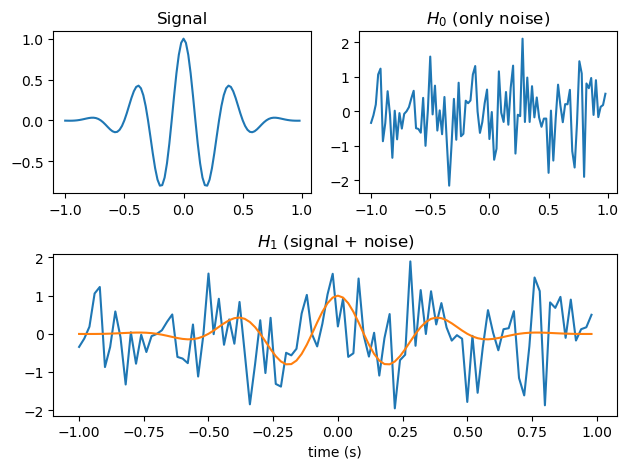

In [13]:
# =====================================================
# Here we create and plot our known waveform (Gaussian)
# =====================================================
t = np.linspace(-1, 1, 2 * 50, endpoint=False)  # time axis
s = signal.gausspulse(t, fc=2.5)  # make waveform (gasussian pulse)
Es = np.dot(s.T,s) # Energy of the wave

N = len(t)
NoisePower = 0.75
NoiseMean = 0
w =  np.random.normal(NoiseMean, NoisePower, N)
x0 = w
x1 = s+w

# plot
fig = plt.figure(clear=True)
gs = GridSpec(2, 2, figure=fig)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, :])

ax1.plot(t,s)
ax1.set_title('Signal')

ax2.plot(t,x0)
ax2.set_title('$H_0$ (only noise)')

ax3.plot(t,x1)
ax3.plot(t,s)
ax3.set_title('$H_1$ (signal + noise)')
ax3.set_xlabel('time (s)')

plt.tight_layout()

To find the desired threshold and the probability of detection, we need to find the probability density functions of hypotheses $H_0$ and $H_1$, i.e., $p(T(x)|H_0)$ and $p(T(x)|H_1)$. According to the calculations seen in class:

for $H_0$

\begin{equation}
\mu_{T(x)|H_0}=E\left[T(x)|H_0\right]=\mu_w\sum_{n=0}^{N-1}s[n]=0
\tag{26}
\end{equation}

and

\begin{equation}
\sigma_{T(x)|H_0}^2=E\left[(T(x)|H_0-\mu_{T(x)|H_0}\right)^2]=\sigma^2E_s
\tag{27}
\end{equation}

and for $H_1$

\begin{equation}
\mu_{T(x)|H_1}=E\left[T(x)|H_1\right]=E_s+\mu_w\sum_{n=0}^{N-1}s[n]=E_s
\tag{28}
\end{equation}

and

\begin{equation}
\sigma_{T(x)|H_1}^2=E\left[(T(x)|H_1-\mu_{T(x)|H_1}\right)^2]=\sigma^2E_s
\tag{29}
\end{equation}

Therefore,

\begin{equation}
p(T(x)|H_0)\sim N(0,\sigma^2E_s)
\tag{30}
\end{equation}

\begin{equation}
p(T(x)|H_1)\sim N(E_s,\sigma^2E_s)
\tag{31}
\end{equation}

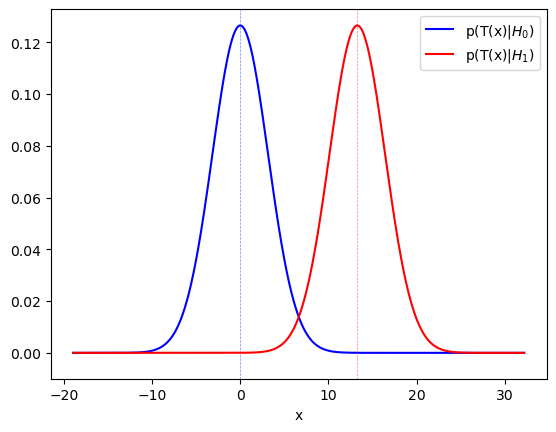

In [14]:
# =================================
# Here we compute and plot the PDFs
# =================================

Mean_H0= 0  # mean under H0
Var_H0 = NoisePower*Es # var under H0
Std_H0 = np.sqrt(Var_H0)  # std under H0

Mean_H1= Es # mean under H1
Var_H1 = NoisePower*Es # var under H0
Std_H1 = np.sqrt(Var_H1)  # std under H1

x_values = np.arange(Mean_H0-6*Std_H0, Mean_H1+6*Std_H1, 0.01)  # creates axis for observations using 6 times the span of the gaussians
pdf_H0 = stats.norm(Mean_H0, Std_H0)
pdf_H1 = stats.norm(Mean_H1, Std_H1)

plt.plot(x_values, pdf_H0.pdf(x_values), color='blue', label='p(T(x)|$H_0$)')
plt.axvline(x=Mean_H0, color='blue', linestyle='--', linewidth=0.5, alpha=0.5)
plt.plot(x_values, pdf_H1.pdf(x_values), color='red', label='p(T(x)|$H_1$)')
plt.axvline(x=Mean_H1, color='red', linestyle='--', linewidth=0.5, alpha=0.5)
plt.ylim(bottom=-0.01)
plt.xlabel('x')
plt.legend()

print()

In [17]:
# ======================================================
# Here we compute all probabilities (Pfa, Pd, Pmiss, Pe)
# ======================================================

PH1 = 1/2
PH0 = 1/2
PFA = 0.1

Pfa_NP = PFA # given by the problem statement
Th = pdf_H0.ppf(1-Pfa_NP)  # calculate threshold under hypothesis H0
Pd = 1-pdf_H1.cdf(Th)  # calculate Pd under hypothesis H1 (threshold already known)
Pmiss = 1 - Pd
Pe = Pfa_NP*PH0 + Pmiss*PH1 # recall that for Pe, PH0 and PH1 must be known, which is not always true when using Neyman-Pearson
print("Under the Neyman-Pearson criterion, the detector's performance for the given Es and Noisepower values are")
print('Pfa = {}'.format(Pfa_NP))
print('Threshold = {}'.format(Th))
print('Pd = {}'.format(Pd))
print('Pe = {}'.format(Pe))

Under the Neyman-Pearson criterion, the detector's performance for the given Es and Noisepower values are
Pfa = 0.1
Threshold = 4.041897400798405
Pd = 0.9982702927162339
Pe = 0.05086485364188305


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal, stats
import ipywidgets as widgets
from IPython.display import display

# ======================================================
# Calculation and plot as a function of SNR
# ======================================================

# initialize vectors
Pfa_NP = np.arange(0,1,0.01)  # vector with PFA values
Pd_NP = np.zeros_like(Pfa_NP)  # vector with PD values

t = np.linspace(-1, 1, 2 * 50, endpoint=False)  # creates time axis to create the signal
s = signal.gausspulse(t, fc=2.5)  # creates a Gaussian pulse type signal (sinusoid weighted by Gaussian)
Es = np.dot(s.T,s) # Energy of the known waveform

N = len(t)
NoisePower = 0.75
NoiseMean = 0
w =  np.random.normal(NoiseMean, NoisePower, N)
x0 = w # Noise only
x1 = s+w # Signal + Noise

w_PFA = widgets.FloatSlider(value=0.1, min=0.01, max=0.5, step=0.01,
                         description='PFA:', disabled=False,
                         continuous_update=False)

w_SNR = widgets.BoundedFloatText(value=1, min=0, max=20, step=1,
                         description='SNR (dB):', disabled=False,
                         continuous_update=False)

def plotROCpdf(SNRdB, PFA):  
  SNR = 10**(SNRdB/10)
  NoisePower = Es/SNR # noise power

  # Define the PDFs of the statistic T(x)
  Mean_H0= 0  # mean under H0
  Var_H0 = NoisePower*Es # var under H0
  Std_H0 = np.sqrt(Var_H0)  # std under H0

  Mean_H1= Es # mean under H1
  Var_H1 = NoisePower*Es # var under H0
  Std_H1 = np.sqrt(Var_H1)  # std under H1

  x_values = np.arange(Mean_H0-6*Std_H0, Mean_H1+6*Std_H1, 0.01)  # creates axis for observations using 6 times the span of the gaussians
  pdf_H0 = stats.norm(Mean_H0, Std_H0)
  pdf_H1 = stats.norm(Mean_H1, Std_H1)

  # Calculate threshold and PD for the specified PFA  
  TH = pdf_H0.ppf(1-PFA)
  PD = 1-pdf_H1.cdf(TH)
  print('For PFA={:.3f} and SNR={:.3f} dB, the threshold is TH={:.3f}, and PD={:.3f}'.format(PFA,SNRdB,TH,PD))

  # calculate Th and Pd for all Pfa values to draw ROC
  for i in np.arange(len(Pfa_NP)):
    Th_roc = pdf_H0.ppf(1-Pfa_NP[i])
    Pd_NP[i] = 1-pdf_H1.cdf(Th_roc)

  fig = plt.figure(figsize=[12, 6]) # Increased figure size for more subplots
  ax1 = fig.add_subplot(221) # ROC in top-left
  ax2 = fig.add_subplot(222) # PDF in top-right
  ax3 = fig.add_subplot(212) # Signals in the bottom (full width)


  # plot ROC
  ax1.plot(Pfa_NP, Pd_NP, label='$\sigma^2$={:.2f}'.format(NoisePower)) # Added format for better readability
  ax1.axvline(x=PFA, ymin=0, ymax=PD, color='black', linestyle='--', linewidth=1)
  ax1.axhline(y=PD, xmin=0, xmax=PFA, color='black', linestyle='--', linewidth=1)
  ax1.plot(PFA, PD, color='black', marker='o') # specified PFA
  ax1.set_ylim([0, 1])
  ax1.set_xlim([-0.001, 1])
  ax1.set_aspect('equal', 'box')
  ax1.set_xlabel('$P_{FA}$')
  ax1.set_ylabel('$P_{D}$')
  ax1.set_title('ROC Curve')
  ax1.legend()


  # plot pdf
  ax2.plot(x_values, pdf_H0.pdf(x_values), color='blue', label='p(T(x)|$H_0$)') # p(x|H0)
  ax2.plot(x_values, pdf_H1.pdf(x_values), color='red', label='p(T(x)|$H_1$)') # p(x|H1)

  # fill area under pdf beyond selected PFA
  x_tofill = np.arange(TH, x_values[-1], 0.01)
  ax2.fill_between(x_tofill,  pdf_H1.pdf(x_tofill), y2=0, color='coral', alpha=0.5, label='$P_D$')
  ax2.fill_between(x_tofill,  pdf_H0.pdf(x_tofill), y2=0, color='blue', alpha=0.5, label='$P_{FA}$')
  
  # plot vertical line at TH
  ax2.axvline(x=TH, color='black', linewidth=1, label='Threshold')
  ax2.set_ylim(bottom=0)
  ax2.set_xlabel('Statistic T(x)')
  ax2.set_title('Probability Density Functions')
  ax2.legend(loc='upper right')

  # ---- NEW PLOTS OF SIGNALS AND T(x) VALUE ----
  # Generate a new noise sample and a signal with noise to display
  current_noise = np.random.normal(NoiseMean, np.sqrt(NoisePower), N) # sqrt because NoisePower is variance
  current_x = s + current_noise # Signal + Noise

  # Calculate the detector statistic T(x) at zero lag (dot product)
  Tx_value = np.dot(current_x, s)

  ax3.plot(t, s, 'g-', label='Known Signal s[n]')
  ax3.plot(t, current_x, 'b-', alpha=0.7, label='Received Signal x[n] (s[n]+noise)')
  
  # Include T(x) value in the legend
  ax3.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=2,
             title=f'T(x) value: {Tx_value:.2f}')
  ax3.set_xlabel('Time')
  ax3.set_title('Received Signal and Known Waveform')
  ax3.grid(True)
  # ---------------------------------------------

  fig.tight_layout() # Automatic adjustment of subplots to prevent overlap
  fig.canvas.draw()

ui = widgets.HBox([w_SNR, w_PFA])
out = widgets.interactive_output(plotROCpdf, {'SNRdB':w_SNR, 'PFA':w_PFA})
display(ui, out)

Output()